# 이미지 처리

In [ ]:
# !pip install opencv-python
# !pip install matplotlib

## 이미지 밝기 계산 및 평가

평균밝기: 209.58
🤣이미지가 너무 밝습니다.


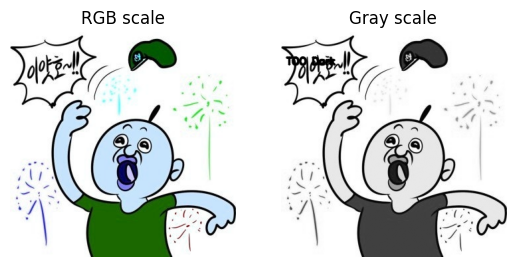

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 # RGB -> BGR

# 1. numpy로 즉석 이미지 생성
# img = np.random.randint(0,256, (100,100,3), dtype = np.uint8)
img = cv2.imread('/kwon/Untitled Folder/down.jpg')

# 2. 그레이스케일 변환(색상 -> 밝기)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


# 3. 이미지의 평균 밝기를 계산
mean_brighteness = np.mean(gray)
print(f"평균밝기: {mean_brighteness:.2f}")


if mean_brighteness < 127.5:
    print("🙈이미지가 너무 어둡습니다.")
    gray = cv2.putText(gray.copy(), "TOO Dark", (10,50), cv2.FONT_HERSHEY_SIMPLEX, 0.6,(255),2,cv2.LINE_AA)

elif mean_brighteness >= 127.9:
    print("🤣이미지가 너무 밝습니다.")
    gray = cv2.putText(gray.copy(), "TOO Dark", (8,50), cv2.FONT_HERSHEY_SIMPLEX, 0.5,(0),2,cv2.LINE_AA)
else:
    print("😁정상이미지 입니다.")
# plt.imshow(img)
# plt.imshow(gray, cmap="gray")
# plt.title("Image Analysis")
# plt.axis('off')
# plt.show()

plt.subplot(1,2,1)
plt.title("RGB scale")
plt.imshow(img)
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Gray scale")
plt.imshow(gray, cmap="gray")
plt.axis('off')
plt.show()

# HSV와 이미지 처리

#### H-HUE(색상) 0~179 (원래는 360 -> openCV 는 180단계로 줄임), 즉 2로 나누면 됨
- 빨강 : 0,179 부근 (양끝)
- 노랑 : 30
- 하늘: 90
- 파랑 : 120
- 보라 : 150
#### S-saturation(채도)
- 0~255 : 값이 낮을수록 회색(탁한색) 높을수록 원색
#### V -value(명도)
- 0~255 : 색의 밝기, 낮을수록 검정(0) 높을수록 밝은상태(255)

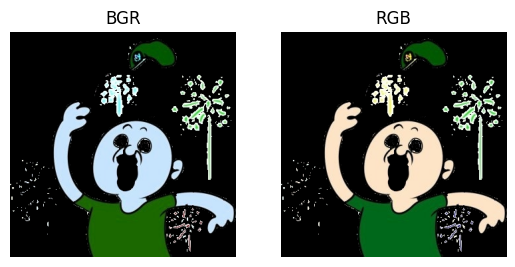

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# numpy로 즉석 이미지 생성
# img = np.random.randint(0, 256, (100, 100, 3), dtype = np.uint8)

hsv_img = cv2.cvtColor(img , cv2.COLOR_BGR2HSV)

# 파란색 범위를 정의(HSV)
lower_blue = np.array([10,10,10])
upper_blue = np.array([140,255,255])

# 마스크
mask = cv2.inRange(hsv_img, lower_blue, upper_blue)

blue_region = cv2.bitwise_and(img, img, mask = mask)
blue_region_rgb = cv2.cvtColor(blue_region, cv2.COLOR_BGR2RGB)

plt.subplot(1,2,1)
plt.title("BGR")
plt.imshow(blue_region)
plt.axis('off')

plt.subplot(1,2,2)
plt.title("RGB")
plt.imshow(blue_region_rgb)
plt.axis('off')
plt.show()

(340, 340, 3)


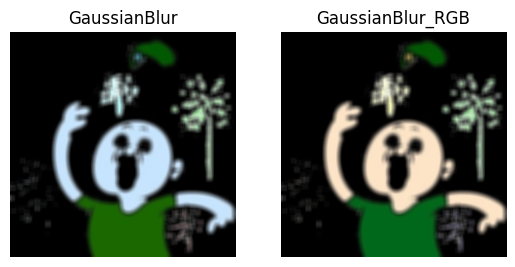

In [47]:
# 가우시안 블러 적용 (노이즈 제거)
blurred = cv2.GaussianBlur(blue_region,(9,9),100)
blurred_rgb = cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB)

print(blurred.shape)

plt.subplot(1,2,1)
plt.title("GaussianBlur")
plt.imshow(blurred)
plt.axis('off')


plt.subplot(1,2,2)
plt.title("GaussianBlur_RGB")
plt.imshow(blurred_rgb)
plt.axis('off')
plt.show()

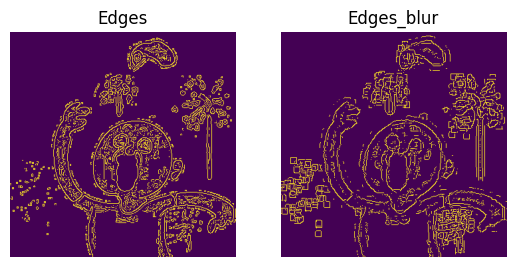

In [48]:
edges = cv2.Canny(blue_region_rgb,1,2) # 50보다 작으면 값을 무시, 150보다 클 경우 강하게 엣지로 인정
edges_blur = cv2.Canny(blurred_rgb,1,2) # 50보다 작으면 값을 무시, 150보다 클 경우 강하게 엣지로 인정

plt.subplot(1,2,1)
plt.title("Edges")
plt.imshow(edges)
plt.axis('off')


plt.subplot(1,2,2)
plt.title("Edges_blur")
plt.imshow(edges_blur)
plt.axis('off')

plt.show()


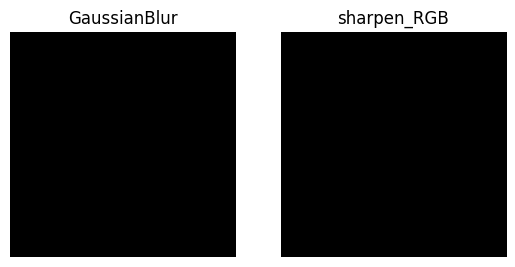

In [45]:
# blurred

# 3x3 선명화 커널
sharp_kernel = np.array([
    [-1, -1, -1],
    [-1, 5, -1],
    [1, 1, 1],
])

sharpen = cv2.filter2D(blurred, -1, sharp_kernel)
sharpen_rgb = cv2.cvtColor(sharpen, cv2.COLOR_BGR2RGB)

plt.subplot(1,2,1)
plt.title("GaussianBlur")
plt.imshow(blurred_rgb)
plt.axis('off')


plt.subplot(1,2,2)
plt.title("sharpen_RGB")
plt.imshow(sharpen_rgb)
plt.axis('off')

plt.show()